In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os 

In [2]:
os.getcwd()

'/Users/saketh/Documents/Insofe/mith/train_test_data-1573736212625/3223'

In [3]:
os.chdir("/Users/saketh/Documents/Insofe/mith/train_test_data-1573736212625/")
os.getcwd()

'/Users/saketh/Documents/Insofe/mith/train_test_data-1573736212625'

In [6]:
data1=pd.read_csv("Train.csv")
data2=pd.read_csv("Train_Transactions.csv")
data3=pd.read_csv("Train_Demographics.csv")
data2.head()

,BillDate,BillNumber,CustomerId,ProductID,Quantity,UnitPrice
0,2013-01-01 8:26,B12551,C25132,PR9338,6,2.55
1,2013-01-01 8:26,B12551,C25132,PR8754,6,3.39
2,2013-01-01 8:26,B12551,C25132,PR8953,8,2.75
3,2013-01-01 8:26,B12551,C25132,PR8905,6,3.39
4,2013-01-01 8:26,B12551,C25132,PR8904,6,3.39


In [5]:
totalprice = pd.DataFrame()
totalprice["CustomerId"]=data1.CustomerId
totalprice["Total_Price"]=0
totalprice.index=[data1.CustomerId]
totalprice.head()

,CustomerId,Total_Price
CustomerId,,
C22981,C22981,0
C28576,C28576,0
C23809,C23809,0
C29339,C29339,0
C30598,C30598,0


# Feature Engineering

In [8]:
%%time
#calculation of total price per Customer ID, this will take sometime

for i,d in enumerate(data2.CustomerId):
    totalprice.loc[data2.iloc[i,2],"Total_Price"]+=(data2.iloc[i,5]*data2.iloc[i,4])
    print(i,end="\r")

    

CPU times: user 28.9 ms, sys: 2.75 ms, total: 31.7 ms
Wall time: 32.2 ms


(3315,)

In [568]:
data2.head()

,BillDate,BillNumber,CustomerId,ProductID,Quantity,UnitPrice
0,2013-01-01 8:26,B12551,C25132,PR9338,6,2.55
1,2013-01-01 8:26,B12551,C25132,PR8754,6,3.39
2,2013-01-01 8:26,B12551,C25132,PR8953,8,2.75
3,2013-01-01 8:26,B12551,C25132,PR8905,6,3.39
4,2013-01-01 8:26,B12551,C25132,PR8904,6,3.39


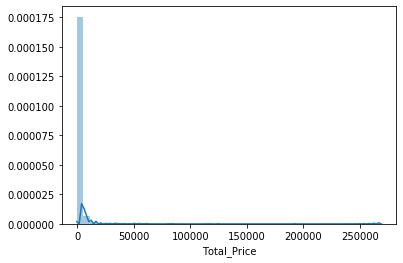

In [1112]:
sns.distplot(totalprice.Total_Price)

In [1113]:
totalprice.to_csv("Total_price0149.csv")

In [1114]:
totalprice.describe()

,Total_Price
count,3315.000000
mean,2240.531161
std,9273.947194
min,2.900000
25%,515.610000
50%,859.350000
75%,1740.455000
max,268452.530000


In [1115]:
totalprice1=totalprice.reset_index(drop=True)

In [1207]:
data=pd.merge(data1,totalprice1,on="CustomerId")
data=pd.merge(data,data3,on="CustomerId")

In [1208]:
data.shape

(3315, 7)

In [1209]:
data.to_csv("mergeddata1.csv")

In [1210]:
data["Age"]=0
for i,x in enumerate(data.DOB):
    data.iloc[i,7]=pd.to_datetime('today').year-pd.to_datetime(data.iloc[i,3]).year




In [1211]:
data.head()

,CustomerId,CustomerValue,Total_Price,DOB,gender,MaritalStatus,Familysize,Age
0,C22981,High,1237.85,1990-11-17,F,Yes,4,29
1,C28576,Low,961.52,1991-08-21,F,Yes,3,28
2,C23809,Low,408.90,1999-12-22,F,Yes,2,20
3,C29339,Low,233.25,1996-03-10,M,Yes,2,23
4,C30598,Low,1271.06,1996-09-19,F,Yes,2,23


In [1212]:
data.drop("DOB",axis=1,inplace=True)

In [1213]:
data.head()

,CustomerId,CustomerValue,Total_Price,gender,MaritalStatus,Familysize,Age
0,C22981,High,1237.85,F,Yes,4,29
1,C28576,Low,961.52,F,Yes,3,28
2,C23809,Low,408.90,F,Yes,2,20
3,C29339,Low,233.25,M,Yes,2,23
4,C30598,Low,1271.06,F,Yes,2,23


In [1214]:
data.dtypes

CustomerId        object
CustomerValue     object
Total_Price      float64
gender            object
MaritalStatus     object
Familysize         int64
Age                int64
dtype: object

# Lets try to get more data from transaction details 

Here we are trying to get the number of times a customer made a transaction at the retail store

In [1124]:
data2.head()

,BillDate,BillNumber,CustomerId,ProductID,Quantity,UnitPrice
0,2013-01-01 08:26:00,B12551,C25132,PR9338,6,2.55
1,2013-01-01 08:26:00,B12551,C25132,PR8754,6,3.39
2,2013-01-01 08:26:00,B12551,C25132,PR8953,8,2.75
3,2013-01-01 08:26:00,B12551,C25132,PR8905,6,3.39
4,2013-01-01 08:26:00,B12551,C25132,PR8904,6,3.39


In [1215]:
billnumbers=pd.DataFrame(data2.groupby("CustomerId").BillNumber.unique())
billnumbers.head()

,BillNumber
CustomerId,
C21117,"[B13099, B14752, B17487, B20389, B22718, B27605]"
C21118,"[B13762, B14662, B17406, B25278]"
C21119,[B29375]
C21121,"[B15467, B15974, B15981, B16589, B16805, B2499..."
C21124,[B18798]


In [1216]:
billnumbers["times"]=0
for i,x in enumerate(billnumbers.times):
    billnumbers.iloc[i,1]=len(billnumbers.iloc[i,0])
    
billnumbers.head()

,BillNumber,times
CustomerId,,
C21117,"[B13099, B14752, B17487, B20389, B22718, B27605]",6
C21118,"[B13762, B14662, B17406, B25278]",4
C21119,[B29375],1
C21121,"[B15467, B15974, B15981, B16589, B16805, B2499...",8
C21124,[B18798],1


In [1217]:
billnumbers.head()

,BillNumber,times
CustomerId,,
C21117,"[B13099, B14752, B17487, B20389, B22718, B27605]",6
C21118,"[B13762, B14662, B17406, B25278]",4
C21119,[B29375],1
C21121,"[B15467, B15974, B15981, B16589, B16805, B2499...",8
C21124,[B18798],1


In [1218]:
data=pd.merge(data,billnumbers,on="CustomerId")

In [1219]:
data.head()

,CustomerId,CustomerValue,Total_Price,gender,MaritalStatus,Familysize,Age,BillNumber,times
0,C22981,High,1237.85,F,Yes,4,29,"[B29979, B30240]",2
1,C28576,Low,961.52,F,Yes,3,28,"[B61358, B61518]",2
2,C23809,Low,408.90,F,Yes,2,20,"[B20505, B27622]",2
3,C29339,Low,233.25,M,Yes,2,23,"[B71493, B71800]",2
4,C30598,Low,1271.06,F,Yes,2,23,"[B81614, B82113]",2


In [1220]:
data.shape

(3315, 9)

## The Accuracy was around 50 with the above, lets try to do better:
## Here we will try and get the rentention i.e the date of the first transaction made and the last one

In [1221]:
data2.BillDate=pd.to_datetime(data2.BillDate)

In [1222]:
data2.dtypes

BillDate      datetime64[ns]
BillNumber            object
CustomerId            object
ProductID             object
Quantity               int64
UnitPrice            float64
dtype: object

In [1223]:
billnumbers.dtypes

BillNumber    object
times          int64
dtype: object

In [1224]:
timedelta=(data2.groupby("CustomerId").BillDate.max()-data2.groupby("CustomerId").BillDate.min()).astype('timedelta64[h]')

timedelta=timedelta/24


In [1225]:
td=pd.DataFrame(timedelta)
td.columns=["retention"]
td.reset_index(inplace=True)

In [1226]:
td.head()

,CustomerId,retention
0,C21117,296.875000
1,C21118,282.750000
2,C21119,0.000000
3,C21121,260.083333
4,C21124,0.000000


In [1227]:
data=pd.merge(data,td,on="CustomerId")
data.head()

,CustomerId,CustomerValue,Total_Price,gender,MaritalStatus,Familysize,Age,BillNumber,times,retention
0,C22981,High,1237.85,F,Yes,4,29,"[B29979, B30240]",2,2.041667
1,C28576,Low,961.52,F,Yes,3,28,"[B61358, B61518]",2,162.875000
2,C23809,Low,408.90,F,Yes,2,20,"[B20505, B27622]",2,110.000000
3,C29339,Low,233.25,M,Yes,2,23,"[B71493, B71800]",2,185.791667
4,C30598,Low,1271.06,F,Yes,2,23,"[B81614, B82113]",2,341.916667


In [1228]:
data.drop("CustomerId",axis=1,inplace=True)
data.drop("BillNumber",axis=1,inplace=True)

In [1229]:
#Type Conversions
data.CustomerValue=data.CustomerValue.astype("category")
data.gender=data.gender.astype("category")
data.Familysize=data.Familysize.astype("category")
data.MaritalStatus=data.MaritalStatus.astype("category")
data.dtypes

CustomerValue    category
Total_Price       float64
gender           category
MaritalStatus    category
Familysize       category
Age                 int64
times               int64
retention         float64
dtype: object

# Exploratory Analysis

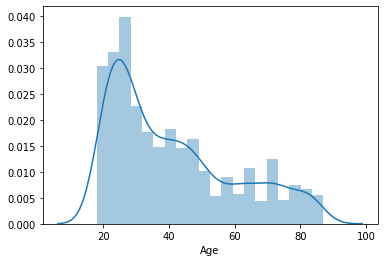

In [1230]:
sns.distplot(data.Age)

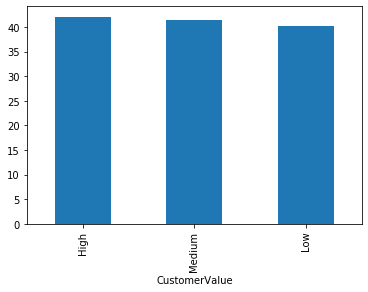

In [1231]:
#checking whether we can see a pattern between age and customer value
data.groupby("CustomerValue").Age.mean().sort_values(ascending=False).plot.bar()

From the above we dont notice any pattern

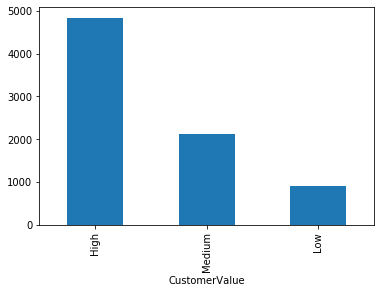

In [1232]:
#checking whether we can see a pattern between Total_amount spent and customer value.
data.groupby("CustomerValue").Total_Price.mean().sort_values(ascending=False).plot.bar()

From the above we can see that amount spent has direct correlation with Customer Value

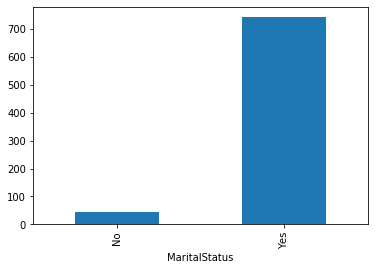

In [1233]:
data[data.CustomerValue=="High"].groupby("MaritalStatus").MaritalStatus.count().plot.bar()

### From the above we can see that its Marital Status is Highly Important to having a High Customer Value 

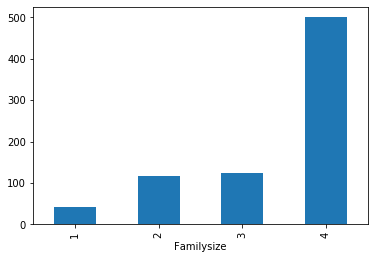

In [1300]:
data[data.CustomerValue=="High"].groupby("Familysize").Familysize.count().plot.bar()

### We can see that the number of members in a family are also very important for making a decision on whether the customer is of high value or not 

In [1235]:
data.isnull().sum()

CustomerValue    0
Total_Price      0
gender           0
MaritalStatus    0
Familysize       0
Age              0
times            0
retention        0
dtype: int64

In [1236]:
data.to_csv("databeforebinning.csv",index=False)

# Binning the Age

In [1268]:
bins = [0,25,35,45,60,100]

group_names = ['0-25', '25-35', '35-45', '45-60',"60-100"]

data['Age'] = pd.cut(data['Age'], bins, labels=group_names)

data.head(3)

,CustomerValue,Total_Price,gender,MaritalStatus,Familysize,Age,times,retention
0,High,1237.85,F,Yes,4,25-35,2,2.041667
1,Low,961.52,F,Yes,3,25-35,2,162.875000
2,Low,408.90,F,Yes,2,0-25,2,110.000000


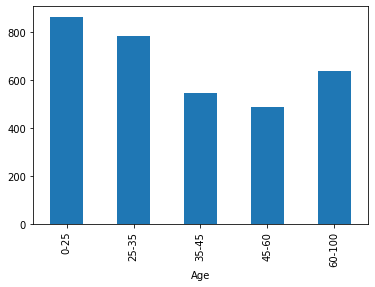

In [1269]:
data.groupby("Age").Age.count().plot.bar()

In [1270]:
data.dtypes

CustomerValue    category
Total_Price       float64
gender           category
MaritalStatus    category
Familysize       category
Age              category
times               int64
retention         float64
dtype: object

# Splitting the Data

In [1271]:
X_train,X_test,Y_train,Y_test=train_test_split(data.iloc[:,1:],data["CustomerValue"],test_size=0.3,random_state=2345)

In [1272]:
X_train_num=X_train.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
X_test_num=X_test.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
X_train_cat=X_train.select_dtypes(include=["category"])
X_test_cat=X_test.select_dtypes(include=["category"])
X_train_num.head(2)

,Total_Price,times,retention
667,1238.47,2,102.875
2057,223.58,1,0.000


In [1273]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_num)
X_trainstand=pd.DataFrame(scaler.transform(X_train_num),columns=X_train_num.columns)
X_teststand=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns)
X_trainstand.shape

(2320, 3)

In [1274]:
d=pd.get_dummies(X_train_cat,drop_first=True)
d.shape
dt=pd.get_dummies(X_test_cat,drop_first=True)
d.head()

,gender_M,MaritalStatus_Yes,Familysize_2,Familysize_3,Familysize_4,Age_25-35,Age_35-45,Age_45-60,Age_60-100
667,1,1,0,0,1,0,0,0,1
2057,0,1,0,0,1,0,0,1,0
1633,1,1,0,0,1,0,0,0,1
942,1,1,1,0,0,1,0,0,0
2515,0,1,0,0,1,0,0,1,0


In [1275]:
d.reset_index(drop=True,inplace=True)
dt.reset_index(drop=True,inplace=True)

In [1276]:
X_train_processed=pd.merge(X_trainstand,d,left_index=True,right_index=True)
X_test_processed=pd.merge(X_teststand,dt,left_index=True,right_index=True)

X_train_processed.head()

,Total_Price,times,retention,gender_M,MaritalStatus_Yes,Familysize_2,Familysize_3,Familysize_4,Age_25-35,Age_35-45,Age_45-60,Age_60-100
0,-0.107848,-0.322581,-0.897432,1,1,0,0,1,0,0,0,1
1,-0.204925,-0.465485,-1.856651,0,1,0,0,1,0,0,1,0
2,-0.130760,-0.036773,-0.533014,1,1,0,0,1,0,0,0,1
3,-0.178847,-0.179677,1.211763,1,1,1,0,0,1,0,0,0
4,-0.200235,-0.322581,-1.228827,0,1,0,0,1,0,0,1,0


In [1277]:
X_train_processed.shape

(2320, 12)

# KNN

In [1278]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, classification_report
# Let's build a 13-D KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3,weights="distance",algorithm="brute")
knn_classifier.fit(X_train_processed, Y_train)
pred_test = knn_classifier.predict(X_test_processed)
cm_test = confusion_matrix(y_pred=pred_test, y_true=Y_test)
print("Accuracy:", sum(np.diag(cm_test))/np.sum(cm_test))
print("Error:", np.round(1-sum(np.diag(cm_test))/np.sum(cm_test),2))
# Can you possibly, at best get an accuracy of 99% or an error of 1% with this data, using any other model?
# Why/Why not?

Accuracy: 0.8030150753768844
Error: 0.2


In [1279]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 15, 1)

# We can create Python dictionary using [] or dict()
err = []
k_val = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_processed, Y_train)
    y_pred = knn.predict(X_test_processed)
    err.append(1-accuracy_score(Y_test, y_pred))
    k_val.append(k)

print(err)

[0.20502512562814068, 0.22512562814070347, 0.18391959798994972, 0.19396984924623117, 0.19195979899497484, 0.19798994974874373, 0.1989949748743719, 0.2160804020100503, 0.21206030150753774, 0.21407035175879396, 0.2160804020100503, 0.2331658291457287, 0.22211055276381908, 0.23115577889447236]


Text(0, 0.5, 'Error on test data')

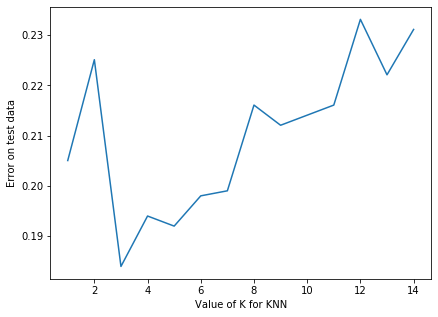

In [1301]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))


plt.subplot(1,2,2)
plt.plot(k_range, err)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error on test data')

# Decision Tree Classifier

In [1308]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=7)
dt.fit(X_train_processed, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1309]:
y_pred=dt.predict(X_train_processed)
y_pred_test=dt.predict(X_test_processed)

In [1310]:

print("Accuracy for Train set:")
print(accuracy_score(Y_train,y_pred))


print("Accuracy for Test set:")
print(accuracy_score(Y_test,y_pred_test))

print("\n")




Accuracy for Train set:
0.9099137931034482
Accuracy for Test set:
0.8623115577889447




# Random Forest 

In [1311]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=9,max_depth=8,criterion="gini",random_state=1244)
clf.fit(X=X_train_processed, y=Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=1244,
                       verbose=0, warm_start=False)

In [1312]:
y_pred=clf.predict(X_train_processed)
y_pred_test=clf.predict(X_test_processed)

In [1313]:

print("Accuracy for Train set:")
print(accuracy_score(Y_train,y_pred))


print("Accuracy for Test set:")
print(accuracy_score(Y_test,y_pred_test))

print("\n")



Accuracy for Train set:
0.9064655172413794
Accuracy for Test set:
0.8562814070351759




In [1287]:
importances = clf.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 4  8  6 11  3 10  7  9  5  0  2  1]


In [1288]:
indices1 = np.argsort(importances)[::-1]
print(indices1)
pd.DataFrame([X_train_processed.columns[indices1],np.sort(importances)[::-1]])

[ 1  2  0  5  9  7 10  3 11  6  8  4]


,0,1,2,3,4,5,6,7,8,9,10,11
0,times,retention,Total_Price,Familysize_2,Age_35-45,Familysize_4,Age_45-60,gender_M,Age_60-100,Familysize_3,Age_25-35,MaritalStatus_Yes
1,0.417626,0.371083,0.10464,0.0282545,0.0259989,0.0198942,0.00992663,0.00737723,0.00528917,0.0048507,0.00326724,0.00179266


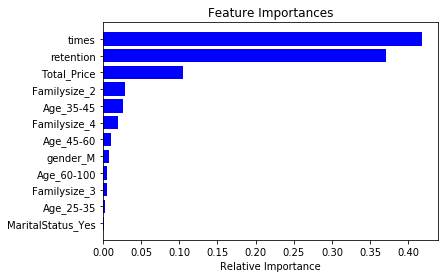

In [1289]:
import matplotlib.pyplot as plt
%matplotlib inline
features = X_train_processed.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Cross Validation For RF

In [1290]:
#GridSearch
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'n_estimators': [11,13,15,17],
     'max_depth':[7,8,9,10]
}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_clf.fit(X=X_train_processed, y=Y_train)
CV_clf.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [1291]:
y_pred=CV_clf.predict(X_train_processed)
y_pred_test=CV_clf.predict(X_test_processed)

In [1292]:

print("Accuracy for Train set:")
print(accuracy_score(Y_train,y_pred))


print("Accuracy for Test set:")
print(accuracy_score(Y_test,y_pred_test))

print("\n")


Accuracy for Train set:
0.9370689655172414
Accuracy for Test set:
0.8683417085427135




# XGBoost

In [1293]:
#XGBoost
from xgboost import XGBClassifier
XGB_model = XGBClassifier(max_depth=5,learning_rate=0.05,reg_alpha=0.1,reg_lambda=0.9,random_state=3456)
XGB_model.fit(X_train_processed, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=3456,
              reg_alpha=0.1, reg_lambda=0.9, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [1294]:
y_pred=XGB_model.predict(X_train_processed)
y_pred_test=XGB_model.predict(X_test_processed)

In [1326]:
#GridSearch
from sklearn.model_selection import GridSearchCV

XGB = XGBClassifier(n_jobs=-1)
 
# Using a grid over parameters of interest
param_grid = {
     'learning_rate': [0.08],
     'reg_aplha':[0.1,0.05],
     'reg_lambda':[0.7,0.4],
     'max_depth':[5,7]
}

CV_clf = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 5)
CV_clf.fit(X=X_train_processed, y=Y_train)
CV_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.08, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_aplha=0.1, reg_lambda=0.4, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [1327]:
X_train_processed.head()

,Total_Price,times,retention,gender_M,MaritalStatus_Yes,Familysize_2,Familysize_3,Familysize_4,Age_25-35,Age_35-45,Age_45-60,Age_60-100
0,-0.107848,-0.322581,-0.897432,1,1,0,0,1,0,0,0,1
1,-0.204925,-0.465485,-1.856651,0,1,0,0,1,0,0,1,0
2,-0.130760,-0.036773,-0.533014,1,1,0,0,1,0,0,0,1
3,-0.178847,-0.179677,1.211763,1,1,1,0,0,1,0,0,0
4,-0.200235,-0.322581,-1.228827,0,1,0,0,1,0,0,1,0


In [1328]:
y_pred=CV_clf.predict(X_train_processed)
y_pred_test=CV_clf.predict(X_test_processed)

In [1329]:

print("Accuracy for Train set:")
print(accuracy_score(Y_train,y_pred))


print("Accuracy for Test set:")
print(accuracy_score(Y_test,y_pred_test))

print("\n")


Accuracy for Train set:
0.9426724137931034
Accuracy for Test set:
0.8884422110552764




# Prediction on Test Data 

In [1348]:
data_test1=pd.read_csv("Test.csv")
data_test2=pd.read_csv("Test_Transactions.csv")
data_test3=pd.read_csv("Test_Demographics.csv")
data_test1.shape

(940, 1)

In [1349]:
totalpricetest = pd.DataFrame()
totalpricetest["CustomerId"]=data_test1.CustomerId
totalpricetest["Total_Price"]=0
totalpricetest.index=[data_test1.CustomerId]
totalpricetest.head()

,CustomerId,Total_Price
CustomerId,,
C21116,C21116,0
C21123,C21123,0
C21126,C21126,0
C21142,C21142,0
C21152,C21152,0


In [1350]:
%%time
#calculation of total price per Customer ID, this will take sometime

for i,d in enumerate(data_test2.CustomerId):
    totalpricetest.loc[data_test2.iloc[i,2],"Total_Price"]+=(data_test2.iloc[i,5]*data_test2.iloc[i,4])
    print(i,end="\r")
    

CPU times: user 4min 17s, sys: 28 s, total: 4min 45s
Wall time: 4min 43s


In [1351]:
totalpricetest1=totalpricetest.reset_index(drop=True)

In [1352]:
finald=pd.merge(data_test1,totalpricetest1,on="CustomerId")
finald=pd.merge(finald,data_test3,on="CustomerId")
finald.head()



,CustomerId,Total_Price,DOB,gender,MaritalStatus,Familysize
0,C21116,77183.60,1963-12-19,M,Yes,4
1,C21123,1079.40,1943-03-12,M,Yes,4
2,C21126,6207.67,1998-08-27,F,Yes,2
3,C21142,1628.12,1946-04-23,F,Yes,4
4,C21152,452.36,1978-02-02,M,Yes,4


In [1353]:
finald["Age"]=0
for i,x in enumerate(finald.DOB):
    finald.iloc[i,6]=pd.to_datetime('today').year-pd.to_datetime(finald.iloc[i,2]).year



In [1354]:
finald.head()

,CustomerId,Total_Price,DOB,gender,MaritalStatus,Familysize,Age
0,C21116,77183.60,1963-12-19,M,Yes,4,56
1,C21123,1079.40,1943-03-12,M,Yes,4,76
2,C21126,6207.67,1998-08-27,F,Yes,2,21
3,C21142,1628.12,1946-04-23,F,Yes,4,73
4,C21152,452.36,1978-02-02,M,Yes,4,41


In [1355]:
finald.drop("DOB",axis=1,inplace=True)

billnumbers=pd.DataFrame(data_test2.groupby("CustomerId").BillNumber.unique())
billnumbers.head()

billnumbers["times"]=0
for i,x in enumerate(billnumbers.times):
    billnumbers.iloc[i,1]=len(billnumbers.iloc[i,0])
    
billnumbers.head()

finald=pd.merge(finald,billnumbers,on="CustomerId")

In [1356]:
finald.head()

,CustomerId,Total_Price,gender,MaritalStatus,Familysize,Age,BillNumber,times
0,C21116,77183.60,M,Yes,4,56,[B14456],1
1,C21123,1079.40,M,Yes,4,76,[B18179],1
2,C21126,6207.67,F,Yes,2,21,[B28083],1
3,C21142,1628.12,F,Yes,4,73,"[B13842, B14849]",2
4,C21152,452.36,M,Yes,4,41,[B29205],1


In [1357]:
data_test2.BillDate=pd.to_datetime(data_test2.BillDate)
timedelta1=(data_test2.groupby("CustomerId").BillDate.max()-data_test2.groupby("CustomerId").BillDate.min()).astype('timedelta64[h]')

timedelta1=timedelta1/24
td1=pd.DataFrame(timedelta1)
td1.columns=["retention"]
td1.reset_index(inplace=True)
finald=pd.merge(finald,td1,on="CustomerId")
finald.head()

,CustomerId,Total_Price,gender,MaritalStatus,Familysize,Age,BillNumber,times,retention
0,C21116,77183.60,M,Yes,4,56,[B14456],1,0.00
1,C21123,1079.40,M,Yes,4,76,[B18179],1,0.00
2,C21126,6207.67,F,Yes,2,21,[B28083],1,0.00
3,C21142,1628.12,F,Yes,4,73,"[B13842, B14849]",2,39.25
4,C21152,452.36,M,Yes,4,41,[B29205],1,0.00


In [1358]:
#Type Conversions
finald.gender=data.gender.astype("category")
finald.Familysize=data.Familysize.astype("category")
finald.MaritalStatus=data.MaritalStatus.astype("category")
finald.dtypes

CustomerId         object
Total_Price       float64
gender           category
MaritalStatus    category
Familysize       category
Age                 int64
BillNumber         object
times               int64
retention         float64
dtype: object

In [1359]:
bins = [0,25,35,45,60,100]

group_names = ['0-25', '25-35', '35-45', '45-60',"60-100"]

finald['Age'] = pd.cut(finald['Age'], bins, labels=group_names)

finald.head(4)

,CustomerId,Total_Price,gender,MaritalStatus,Familysize,Age,BillNumber,times,retention
0,C21116,77183.60,F,Yes,4,45-60,[B14456],1,0.00
1,C21123,1079.40,F,Yes,3,60-100,[B18179],1,0.00
2,C21126,6207.67,F,Yes,2,0-25,[B28083],1,0.00
3,C21142,1628.12,M,Yes,2,60-100,"[B13842, B14849]",2,39.25


In [1360]:
finald.head(4)

,CustomerId,Total_Price,gender,MaritalStatus,Familysize,Age,BillNumber,times,retention
0,C21116,77183.60,F,Yes,4,45-60,[B14456],1,0.00
1,C21123,1079.40,F,Yes,3,60-100,[B18179],1,0.00
2,C21126,6207.67,F,Yes,2,0-25,[B28083],1,0.00
3,C21142,1628.12,M,Yes,2,60-100,"[B13842, B14849]",2,39.25


In [1361]:
finald.columns

Index(['CustomerId', 'Total_Price', 'gender', 'MaritalStatus', 'Familysize',
       'Age', 'BillNumber', 'times', 'retention'],
      dtype='object')

In [1362]:
X_num=finald.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
X_cat=finald.select_dtypes(include=["category"])
X_cat.head(3)

,gender,MaritalStatus,Familysize,Age
0,F,Yes,4,45-60
1,F,Yes,3,60-100
2,F,Yes,2,0-25


In [1363]:
d=pd.get_dummies(X_cat,drop_first=True)
X_stand=pd.DataFrame(scaler.transform(X_num),columns=X_num.columns)
X_processed=pd.merge(X_stand,d,left_index=True,right_index=True)

In [1364]:
X_processed.head()

,Total_Price,times,retention,gender_M,MaritalStatus_Yes,Familysize_2,Familysize_3,Familysize_4,Age_25-35,Age_35-45,Age_45-60,Age_60-100
0,7.156490,-0.465485,-1.856651,0,1,0,0,1,0,0,1,0
1,-0.123064,-0.465485,-1.856651,0,1,0,1,0,0,0,0,1
2,0.367468,-0.465485,-1.856651,0,1,1,0,0,0,0,0,0
3,-0.070577,-0.322581,-1.490680,1,1,1,0,0,0,0,0,1
4,-0.183042,-0.465485,-1.856651,0,1,1,0,0,0,1,0,0


In [1370]:
final_test=CV_clf.predict(X_processed)

In [1366]:
final=pd.DataFrame(final_test)

final["CustomerId"]=data_test1.CustomerId
final.columns=["CustomerValue","CustomerId"]
final.head()

,CustomerValue,CustomerId
0,High,C21116
1,High,C21123
2,High,C21126
3,High,C21142
4,High,C21152


In [1367]:
final=final[["CustomerId","CustomerValue"]]

In [1368]:
final.head()

,CustomerId,CustomerValue
0,C21116,High
1,C21123,High
2,C21126,High
3,C21142,High
4,C21152,High


In [1369]:
final.to_csv("submission5.csv",index=False)

#### Got a score of 67% Accuracy